## VIVEK BHAVSHAR
## Wind Farm Energy Production  
### Regression Models

# Importing Importnat file

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import missingno as msno
from sklearn import metrics 

In [32]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# Data Frame 1 - Wind Production Data set

In [2]:
df1=pd.read_csv(r'C:/Users/VIVEK/Downloads/2015contest_CSV/windfarm_production.csv')
df1.head()

,Date,Hour,Electricity_KW_HR
0,3/25/2011,1,6476
1,3/25/2011,2,3512
2,3/25/2011,3,2376
3,3/25/2011,4,3056
4,3/25/2011,5,2084


In [3]:
df1.shape

(15385, 3)

In [4]:
df1.isnull().sum()

Date                 0
Hour                 0
Electricity_KW_HR    0
dtype: int64

# Data Frame 2 - Wind Windspeed

In [5]:
df2=pd.read_csv(r'C:/Users/VIVEK/Downloads/2015contest_CSV/windfarm_windspeed.csv')
df2.head()

,Date,Hour,Wind_Speed
0,3/25/2011,24,4.9
1,3/25/2011,1,4.1
2,3/25/2011,2,3.5
3,3/25/2011,3,3.9
4,3/25/2011,4,3.4


In [6]:
df2.shape

(15399, 3)

In [7]:
df2.isnull().sum()

Date          0
Hour          0
Wind_Speed    0
dtype: int64

# Merging Data Sets

In [8]:
df = df1.merge(df2)
df.head()

,Date,Hour,Electricity_KW_HR,Wind_Speed
0,3/25/2011,1,6476,4.1
1,3/25/2011,2,3512,3.5
2,3/25/2011,3,2376,3.9
3,3/25/2011,4,3056,3.4
4,3/25/2011,5,2084,3.3


In [9]:
df.shape

(15385, 4)

In [10]:
df.isnull().sum()

Date                 0
Hour                 0
Electricity_KW_HR    0
Wind_Speed           0
dtype: int64

In [11]:
#df.to_csv('wind energy.csv')

# Final Data Statistics

In [12]:
df.describe()

,Hour,Electricity_KW_HR,Wind_Speed
count,15385.000000,15385.000000,15385.000000
mean,12.511862,12045.322327,5.803983
std,6.926928,12505.745777,2.530703
min,1.000000,0.000000,0.200000
25%,7.000000,2448.000000,3.900000
50%,13.000000,7872.000000,5.700000
75%,19.000000,17408.000000,7.400000
max,24.000000,64032.000000,24.000000


# Splitting Data into Training and Testing

In [13]:
from sklearn.model_selection import train_test_split
X = df[['Wind_Speed']]
Y = df[['Electricity_KW_HR']]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=42)

# Linear regression

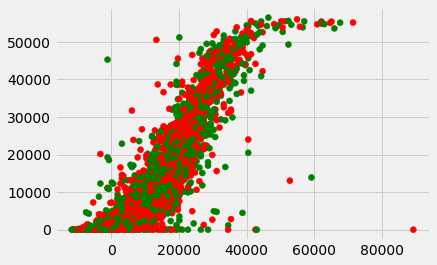

In [43]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression().fit(X_train, Y_train)
predictions = lm.predict(X_test)
plt.scatter(predictions,Y_test, color='rg')

# Linear Regression model with Train/Test

In [28]:
from sklearn import linear_model
# create linear regression object 
rege = linear_model.LinearRegression() 
# train the model using the training sets 
rege.fit(X_train, Y_train)
# regression coefficients 
print('Coefficients: ', rege.coef_)
# regression Intercept 
print('Intercept: ', rege.intercept_)
# variance score: 1 means perfect prediction 
print('Variance score:  {}'.format(rege.score(X_test, Y_test))) 
y_pred = rege.predict(X_test)
#print('Variance score: {}'.format(rege.score(X_test, Y_test))) 
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Coefficients:  [[4243.5369444]]
Intercept:  [-12601.41822324]
Variance score:  0.7597862185105239
Mean Absolute Error: 4404.743970157457
Mean Squared Error: 38065343.06009671
Root Mean Squared Error: 6169.711748541962


# Residual Plot

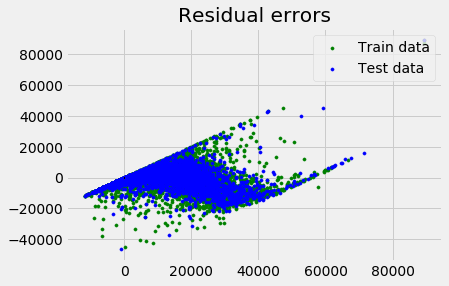

In [29]:
# plot for residual error 
  
## setting plot style 
plt.style.use('fivethirtyeight') 
  
## plotting residual errors in training data 
plt.scatter(rege.predict(X_train), rege.predict(X_train) - Y_train, 
            color = "green", s = 10, label = 'Train data') 
  
## plotting residual errors in test data 
plt.scatter(rege.predict(X_test), rege.predict(X_test) - Y_test, 
            color = "blue", s = 10, label = 'Test data') 
  
## plotting line for zero residual error 
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2) 
  
## plotting legend 
plt.legend(loc = 'upper right') 
  
## plot title 
plt.title("Residual errors") 
  
## function to show plot 
plt.show() 

# Linear reg with Stat Model - Cross Validation

In [30]:
from pandas import DataFrame
from sklearn import linear_model
import statsmodels.api as sm

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

print_model = model.summary()
print(print_model)

Intercept: 
 [-12671.39303592]
Coefficients: 
 [[4258.57810666]]
                            OLS Regression Results                            
Dep. Variable:      Electricity_KW_HR   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                 4.439e+04
Date:                Mon, 10 Jun 2019   Prob (F-statistic):               0.00
Time:                        16:06:30   Log-Likelihood:            -1.5653e+05
No. Observations:               15385   AIC:                         3.131e+05
Df Residuals:                   15383   BIC:                         3.131e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

# RANDOM FOREST REGRESSION 

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import accuracy_score, r2_score, explained_variance_score

rf = RandomForestRegressor(n_estimators=100, max_depth=6, random_state=0)
rf.fit(X_train, Y_train)
y_predrf = rf.predict(X_test)

print('Variance score: {}'.format(rf.score(X_test, Y_test))) 
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_predrf))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_predrf))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_predrf)))  
#print('R2 :',r2_score(Y_test, y_pred))

Variance score: 0.8340614835479053
Mean Absolute Error: 3200.715920584616
Mean Squared Error: 26295354.56486379
Root Mean Squared Error: 5127.899625076898


# SUPPORT VECTOR REGRESSION

In [34]:
from sklearn.svm import SVR
clf = SVR(gamma='scale', C=1.0, epsilon=0.2).fit(X_train, Y_train)
y_predsvm = clf.predict(X_test)
#print(accuracy_score(Y_test, y_pred))
print('Variance score: {}'.format(clf.score(X_test, Y_test))) 
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_predsvm))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_predsvm)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_predsvm)))

Variance score: 0.03265528995821865
Mean Absolute Error: 7900.245171428704
Mean Squared Error: 153289740.5668767
Root Mean Squared Error: 12381.023405473261


# Lasso Regression

In [35]:
from sklearn.linear_model import Lasso
#from sklearn.datasets import make_regression
#X, Y = make_regression(noise=4, random_state=0)
rglasso = Lasso(random_state=0).fit(X_train, Y_train)
#rglasso.score(X, Y) 
y_predls = rglasso.predict(X_test)
print('Variance score: {}'.format(rglasso.score(X_test, Y_test))) 
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_predls))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_predls))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_predls)))

Variance score: 0.759785577891324
Mean Absolute Error: 4404.7409737673
Mean Squared Error: 38065444.575461365
Root Mean Squared Error: 6169.719975449564


# Elastic Net Regression

In [36]:
from sklearn.linear_model import ElasticNet
#from sklearn.datasets import make_regression
#X, Y = make_regression(n_features=2, random_state=0)
rgelastic = ElasticNet(random_state=0)
rgelastic.fit(X_train, Y_train)
#rgelastic.score(X_train, Y_train)
y_predel = rgelastic.predict(X_test)
print('Variance score: {}'.format(rgelastic.score(X_test, Y_test))) 
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_predel))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_predel))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_predel)))

Variance score: 0.7545651907629463
Mean Absolute Error: 4429.057001617372
Mean Squared Error: 38892690.31347043
Root Mean Squared Error: 6236.400429211584


# Ridge Regression

In [37]:
from sklearn.linear_model import Ridge
rid= Ridge(alpha=.1)
rid.fit(X_train, Y_train)
y_predrr = rid.predict(X_test)
# regression coefficients 
print('Coefficients:', rid.coef_) 
# regression Intercept 
print('Intercept:', rid.intercept_)
# variance score: 1 means perfect prediction 
print('Variance score: {}'.format(rid.score(X_test, Y_test))) 
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_predrr))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_predrr))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_predrr)))

Coefficients: [[4243.53073623]]
Intercept: [-12601.38225704]
Variance score: 0.7597861933056439
Mean Absolute Error: 4404.743852084527
Mean Squared Error: 38065347.054173976
Root Mean Squared Error: 6169.712072226222


# Decision Tree Regressor

In [38]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, Y_train)
y_preddt = tree_model.predict(X_test)
print('Variance score: {}'.format(tree_model.score(X_test, Y_test))) 
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_preddt))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_preddt))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_preddt)))

Variance score: 0.8314319519573665
Mean Absolute Error: 3221.8392079382475
Mean Squared Error: 26712041.823440593
Root Mean Squared Error: 5168.369358263842


# KNeighbor Regressor

In [39]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor().fit(X_train, Y_train)
y_predkn = model.predict(X_test)
print('Variance score: {}'.format(model.score(X_test, Y_test))) 
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_predkn))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_predkn))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_predkn)))


Variance score: 0.7999056742915251
Mean Absolute Error: 3621.944020797227
Mean Squared Error: 31707835.850398615
Root Mean Squared Error: 5630.971128535345


# XGBOOST

In [40]:
!pip install xgboost

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [41]:
#Importing neccesary files
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

#Scaling X variable
scaler = StandardScaler()
train_scaled = scaler.fit_transform(X_train)
test_scaled = scaler.transform(X_test)

#Testing XG Boost
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.3,
                max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(train_scaled, Y_train)

preds = xg_reg.predict(test_scaled)

rmse = np.sqrt(mean_squared_error(Y_test, preds))
print("RMSE: %f" % (rmse))


RMSE: 5161.025281
